In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
import numpy as np

In [28]:
dataframe = pd.read_csv("UsuariosGruposAsignados.csv")
dataframe.head()

,Unnamed: 0,ID,Nombre,Edad,Gasto,Motivo,Cluster,Cluster Alojamiento,Cluster Museo
0,0,21,nom1,46,50,2,0,4,-1
1,1,23,nom2,44,94,4,0,4,-1
2,2,29,nom3,46,35,2,0,4,-1
3,3,31,nom4,35,151,16,0,4,-1
4,4,35,nom5,15,108,5,0,4,-1


In [29]:
edad = dataframe['Edad'].values
gasto = dataframe['Gasto'].values
motiv =dataframe['Motivo'].values
nom =dataframe['Nombre'].values
ids = dataframe['ID'].values
Data = {'x' : edad, 'y' : gasto, 'z' : motiv}
df = DataFrame(Data,columns=['x','y','z'])
df
#print(ids,edad,gasto)

,x,y,z
0,46,50,2
1,44,94,4
2,46,35,2
3,35,151,16
4,15,108,5
...,...,...,...
2366,76,30,8
2367,64,33,7
2368,33,177,7
2369,47,87,2


In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

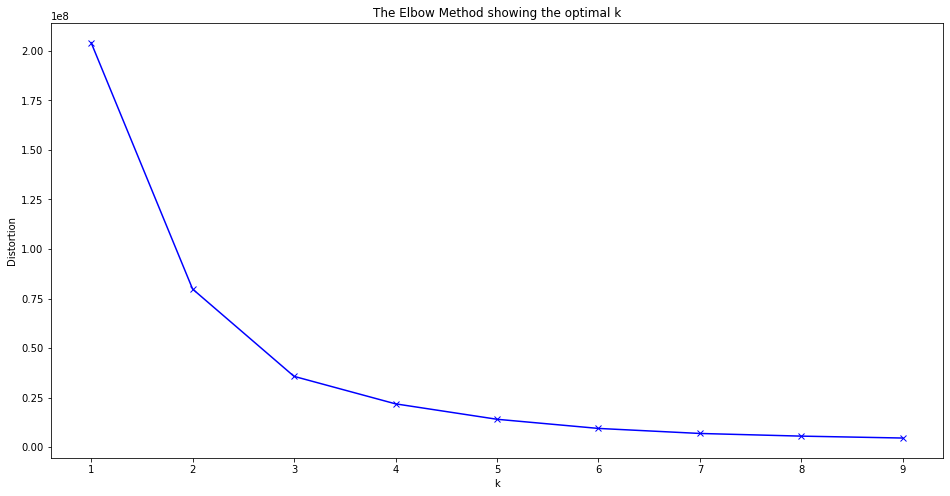

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
centroids = kmeanModel.cluster_centers_
print(centroids)

[[  45.84821429   81.50637755    8.14604592]
 [  49.06        685.41333333    6.55333333]
 [  46.907743    288.2800659     8.51894563]
 [  59.90909091 2591.27272727    7.        ]
 [  47.         1564.6           8.51428571]]


In [34]:
centE = []
centG = []
centM = []
lenc = len(centroids)
xc = 0
while xc < lenc:
    centE.append(centroids[xc][0])
    centG.append(centroids[xc][1])
    centM.append(centroids[xc][2])
    xc +=1
#prueba
"""
usAd = [50, 300, 7]
centE.append(usAd[0])
centG.append(usAd[1])
centM.append(usAd[2])
"""
print(centE)
print(centG)
print(centM)

[45.84821428571424, 49.06, 46.90774299835256, 59.909090909090914, 47.0]
[81.50637755101823, 685.4133333333323, 288.280065897858, 2591.272727272728, 1564.5999999999995]
[8.146045918367347, 6.553333333333335, 8.518945634266888, 7.0, 8.514285714285714]


In [35]:
centroidData = {'Centroide_Edad': centE, 'Centroide_Gasto': centG, 'Centroide_Motivo': centM }
centroidDatas = DataFrame(centroidData,columns=['Centroide_Edad',  'Centroide_Gasto', 'Centroide_Motivo'] )
centroidDatas.to_csv('centroidUsuario.csv')

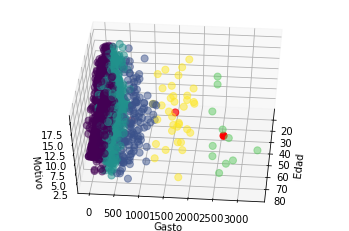

In [36]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
ax.scatter(df['x'], df['y'], df['z'], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
ax.set_xlabel('  Edad')
ax.set_ylabel('Gasto')
ax.set_zlabel('Motivo')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='red', s=50)
ax.view_init(50, 5)
plt.show()

In [37]:
cluster = kmeanModel.labels_

In [38]:
dataCluster = {'ids': ids,'Nombre': nom, 'edad' : edad, 'gasto' : gasto, 'motiv' : motiv, 'cluster' : cluster }
dfCluster = DataFrame(dataCluster,columns=[ 'ids','Nombre','edad','gasto','motiv','cluster'] )
dfCluster

,ids,Nombre,edad,gasto,motiv,cluster
0,21,nom1,46,50,2,0
1,23,nom2,44,94,4,0
2,29,nom3,46,35,2,0
3,31,nom4,35,151,16,0
4,35,nom5,15,108,5,0
...,...,...,...,...,...,...
2366,14359,nom2367,76,30,8,0
2367,14364,nom2368,64,33,7,0
2368,14366,nom2369,33,177,7,0
2369,14372,nom2370,47,87,2,0


In [39]:
dfCluster.to_csv('pruebasClusterUSUARIO.csv')